In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os
import sys
import inspect

currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir) 

import EuropeanOption as euro
import Strategy as strat

In [3]:
S0 = 100
K = 100
t = 0
T = 1
r = 5/100
q = 1/100
sigma = 20/100

model = "BS"
S0_arr = np.linspace(40,150,200)

### Test Call-Put 

In [4]:
call = euro.EuropeanCallOption(model = "BS",S0 = S0, K = K, T = T, t = t, r = r, q = q, sigma = sigma)
put  = euro.EuropeanPutOption(model = "BS",S0 = S0, K = K, T = T, t = t, r = r, q = q, sigma = sigma)

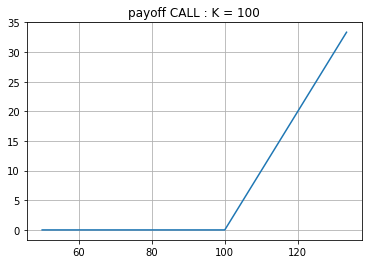

In [5]:
call.plot_payoff()

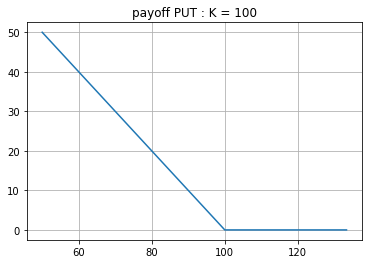

In [6]:
put.plot_payoff()

In [7]:
call.compute_price()

9.826297782739118

### Test Basic Strategies

In [8]:
K1 = 90
K2 = 110

In [9]:
long_CallSpread = strat.CallSpread(model = "BS", S0 = S0, t = t, T = T, r = r, q=q, sigma = sigma,
                                   K1 = K1, K2 = K2, pos = "long")

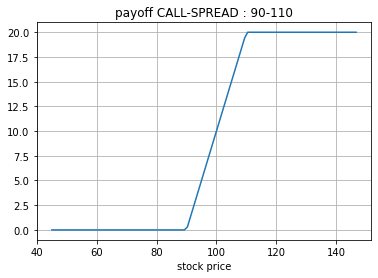

In [10]:
long_CallSpread.plot_payoff()

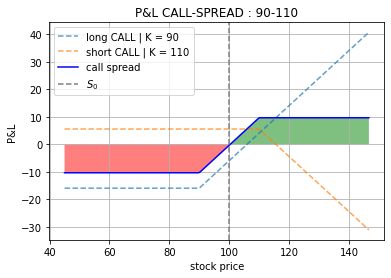

In [11]:
long_CallSpread.plot_PNL()

In [12]:
short_CallSpread = strat.CallSpread(model = "BS", S0 = S0, t = t, T = T, r = r, q=q, sigma = sigma,
                                   K1 = K1, K2 = K2, pos = "short")

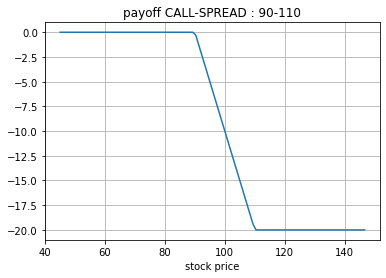

In [13]:
short_CallSpread.plot_payoff()

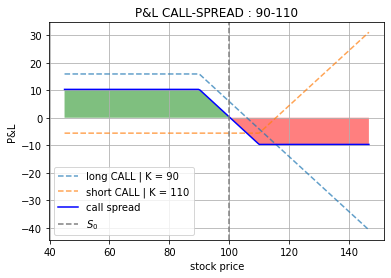

In [14]:
short_CallSpread.plot_PNL()

In [15]:
strat_custom = strat.OptionStrat()

In [16]:
strat_custom.products

array([], dtype=float64)

In [17]:
call_test1 = euro.EuropeanCallOption(model = "BS",S0 = S0, K = K, T = T, t = t, r = r, q = q, sigma = sigma)
pos_call_test1 = "long"

call_test2 = euro.EuropeanCallOption(model = "BS",S0 = S0, K = K+10, T = T, t = t, r = r, q = q, sigma = sigma)
pos_call_test2 = "short"

In [18]:
strat_custom.add_products(call_test1, pos_call_test1)
strat_custom.add_products(call_test2, pos_call_test2)

In [19]:
strat_custom.products

array([<EuropeanOption.EuropeanCallOption object at 0x000001AF6A5FE348>,
      dtype=object)

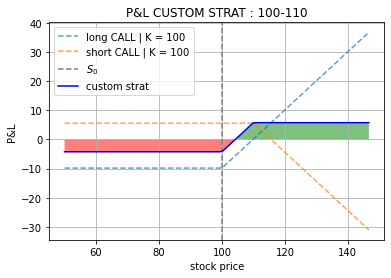

In [20]:
strat_custom.plot_PNL()